In [ ]:
#Reference: SimpleITK documentation: https://simpleitk.readthedocs.io/en/master/

In [3]:
import SimpleITK as sitk
from downloaddata import fetch_data as fdata
%matplotlib notebook
import gui
import registration_gui as rgui
import sys

import numpy as np
import os
OUTPUT_DIR = 'output'

<IPython.core.display.Javascript object>


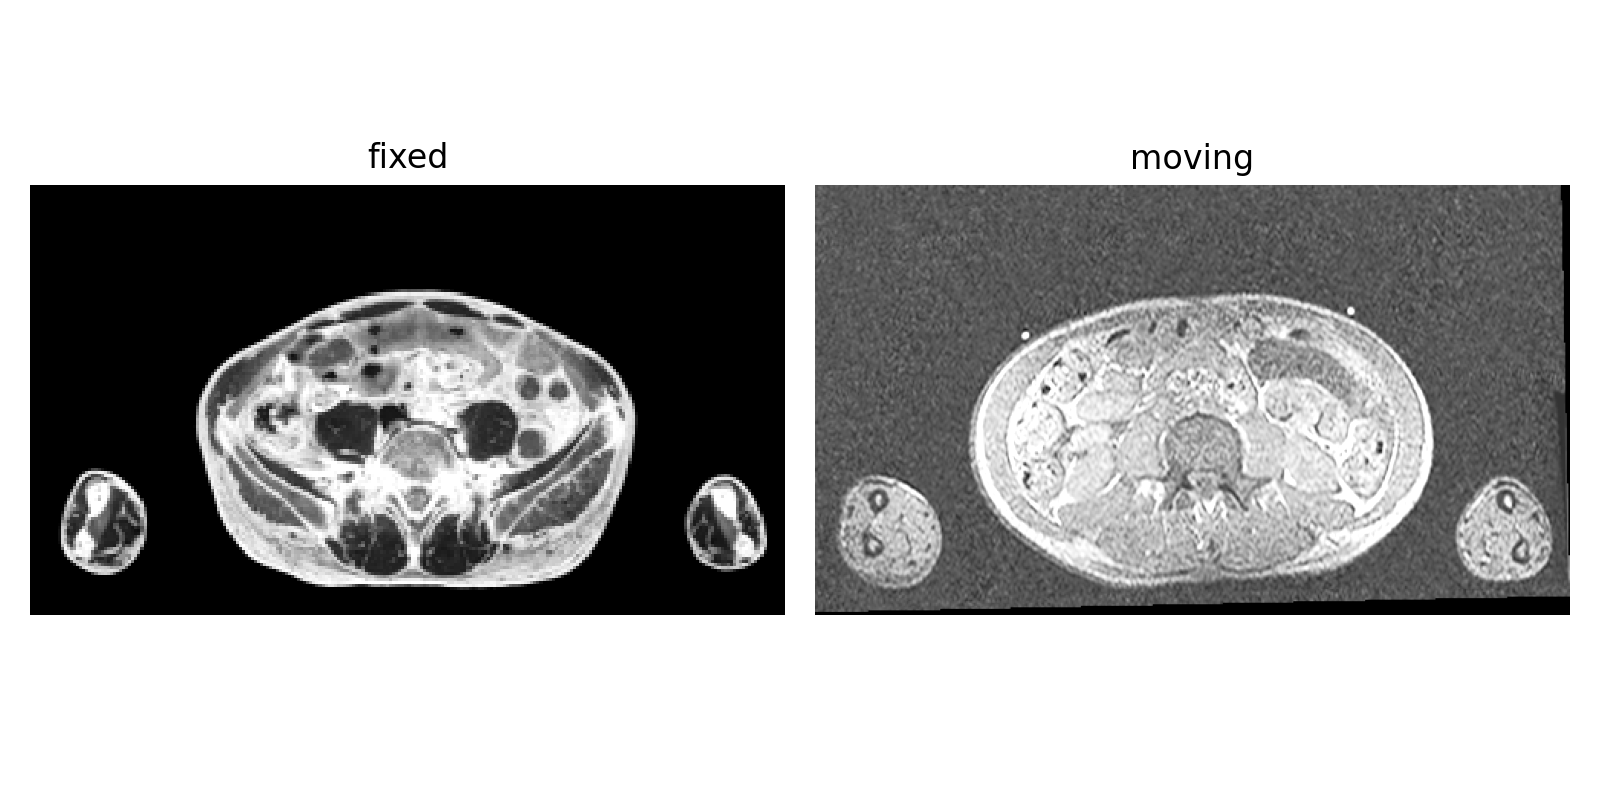

In [9]:
fixed_image =  sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/cryocleaned_abdomen_246x140.mhd", sitk.sitkFloat32)
#moving_image = sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/CT_abdomen.mhd", sitk.sitkFloat32)
moving_image = sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/TUTORIAL/output/MRI_small_transformed_SITK1.mhd", sitk.sitkFloat32)

ct_window_level = [835,162]
mr_window_level = [1036,520]

gui.MultiImageDisplay(image_list = [fixed_image, moving_image],                   
                      title_list = ['fixed', 'moving'], figure_size=(8,4), window_level_list=[ct_window_level, mr_window_level]);

In [12]:
from __future__ import print_function

import SimpleITK as sitk
import sys
import os


def command_iteration(method) :
    print("{0:3} = {1:10.5f}".format(method.GetOptimizerIteration(),
                                     method.GetMetricValue()))
    print("\t#: ", len(method.GetOptimizerPosition()))


def command_multi_iteration(method) :
    print("--------- Resolution Changing ---------")


'''if len ( sys.argv ) < 4:
    print( "Usage: {0} <fixedImageFilter> <movingImageFile> <outputTransformFile>".format(sys.argv[0]))
    sys.exit ( 1 )'''


fixed = fixed_image

moving = moving_image 

transformDomainMeshSize=[10]*moving.GetDimension()
tx = sitk.BSplineTransformInitializer(fixed,
                                      transformDomainMeshSize )

print("Initial Parameters:");
print(tx.GetParameters())

R = sitk.ImageRegistrationMethod()
R.SetMetricAsMattesMutualInformation(50)
R.SetOptimizerAsGradientDescentLineSearch(5.0, 100,
                                          convergenceMinimumValue=1e-4,
                                          convergenceWindowSize=5)
R.SetOptimizerScalesFromPhysicalShift( )
R.SetInitialTransform(tx)
R.SetInterpolator(sitk.sitkLinear)

R.SetShrinkFactorsPerLevel([6,2,1])
R.SetSmoothingSigmasPerLevel([6,2,1])

R.AddCommand( sitk.sitkIterationEvent, lambda: command_iteration(R) )
R.AddCommand( sitk.sitkMultiResolutionIterationEvent, lambda: command_multi_iteration(R) )

outTx = R.Execute(fixed, moving)

print("-------")
print(outTx)
print("Optimizer stop condition: {0}".format(R.GetOptimizerStopConditionDescription()))
print(" Iteration: {0}".format(R.GetOptimizerIteration()))
print(" Metric value: {0}".format(R.GetMetricValue()))

sitk.WriteTransform(outTx,  os.path.join(OUTPUT_DIR, 'bspline.tfm'))

Initial Parameters:
(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

  0 =   -0.11191
	#:  6591
  1 =   -0.17190
	#:  6591
  2 =   -0.23097
	#:  6591
  3 =   -0.29908
	#:  6591
  4 =   -0.38984
	#:  6591
  5 =   -0.47172
	#:  6591
  6 =   -0.52886
	#:  6591
  7 =   -0.56975
	#:  6591
  8 =   -0.60595
	#:  6591
  9 =   -0.62737
	#:  6591
 10 =   -0.64958
	#:  6591
 11 =   -0.66296
	#:  6591
 12 =   -0.67067
	#:  6591
 13 =   -0.67697
	#:  6591
 14 =   -0.68187
	#:  6591
 15 =   -0.68650
	#:  6591
 16 =   -0.69030
	#:  6591
 17 =   -0.69292
	#:  6591
 18 =   -0.69585
	#:  6591
 19 =   -0.69851
	#:  6591
 20 =   -0.70081
	#:  6591
 21 =   -0.70299
	#:  6591
 22 =   -0.70496
	#:  6591
 23 =   -0.70712
	#:  6591
 24 =   -0.70900
	#:  6591
 25 =   -0.71094
	#:  6591
 26 =   -0.71243
	#:  6591
 27 =   -0.71388
	#:  6591
 28 =   -0.71524
	#:  6591
 29 =   -0.71670
	#:  6591
 30 =   -0.71802
	#:  6591
 31 =   -0.71948
	#:  6591
 32 =   -0.72088
	#:  6591
 33 =   -0.72225
	#:  6591
 34 =   -0.72350
	#:  6591
 35 =   -0.72531
	#:  6591
 36 =   -0.72656
	#:  6591
 

In [13]:
if ( not "SITK_NOSHOW" in os.environ ):

    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed);
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetDefaultPixelValue(100)
    resampler.SetTransform(outTx)

    out = resampler.Execute(moving)
    simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
    simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
    cimg = sitk.Compose(simg1, simg2, simg1//2.+simg2//2.)
    sitk.Show( cimg, "ImageRegistration1 Composition" )

In [ ]:
gui.RegistrationPointDataAquisition(fixed_image, cimg, figure_size=(8,4), known_transformation=initial_transform, fixed_window_level=ct_window_level, moving_window_level=mr_window_level);

<IPython.core.display.Javascript object>


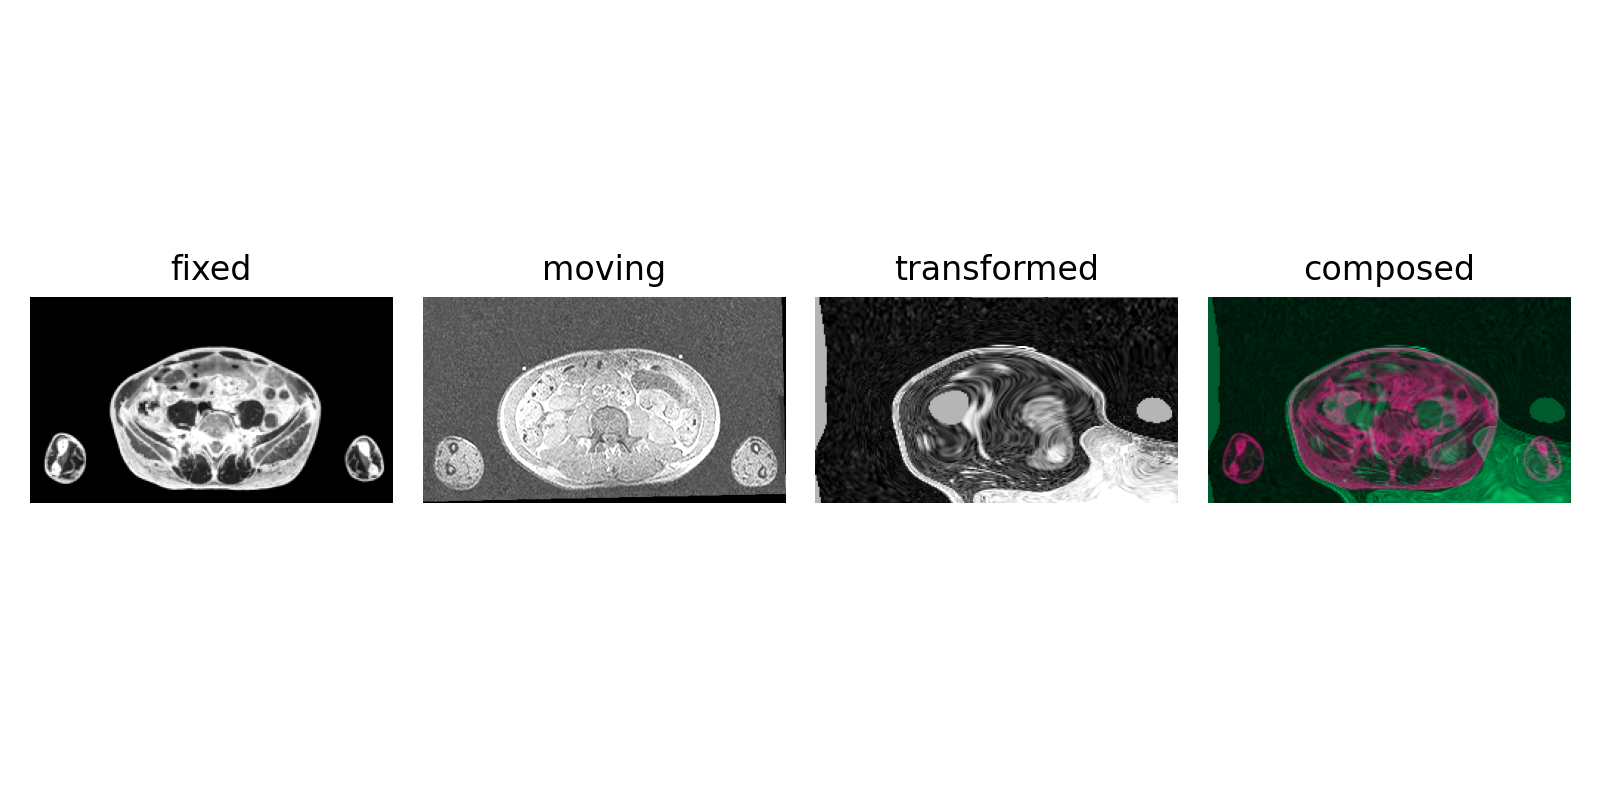

<IPython.core.display.Javascript object>


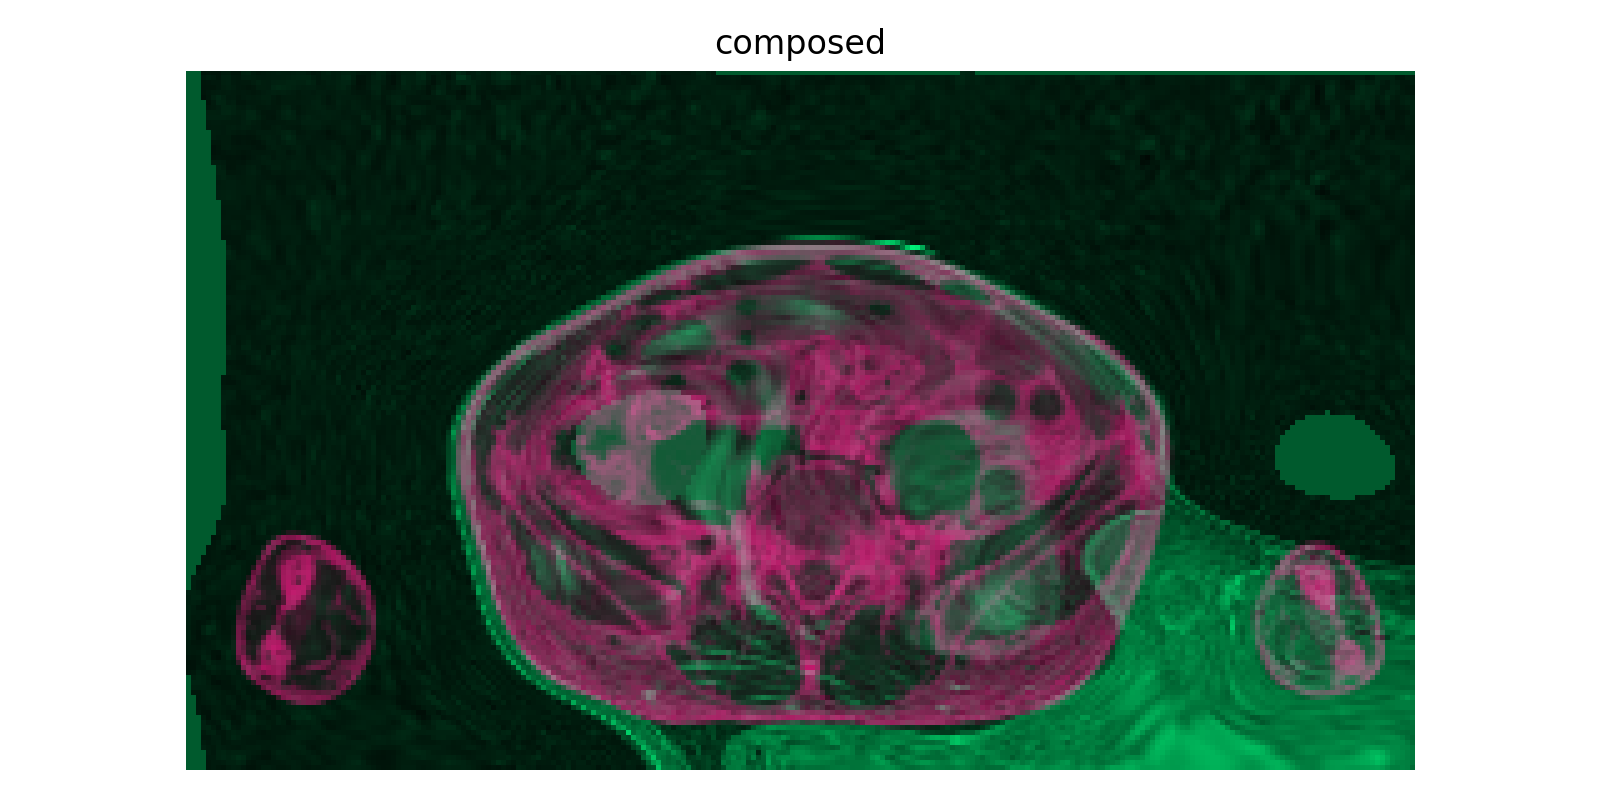

In [14]:
gui.MultiImageDisplay(image_list = [fixed_image, moving_image, out, cimg],                   
                      title_list = ['fixed', 'moving', 'transformed', 'composed'], figure_size=(8,4));


gui.MultiImageDisplay(image_list = [cimg],                   
                      title_list = ['composed'], figure_size=(8,4));



In [11]:
sitk.WriteImage(out, os.path.join(OUTPUT_DIR, "MRI_bspline1afterrigid.mhd"))